Explore exit surveys from employees of the Department of Education, Training and Employment and the Technical and Further Education institute in Queensland, Australia to answer the below questions:

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

import necessary libraries

In [348]:
import pandas as pd
import numpy as np
%matplotlib inline

read the files into dataframes

In [349]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

explore the dataframes

In [350]:
print(dete_survey.info())
print(dete_survey.head())
print(tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

dete_survey: 
NESB means Non-English Speaking Background
Business Unit is loosely populated
Special Characteristics such as Aboriginal, Torres Straight, South Sea, Disability, and NESB are very loosely populated

tafe_survey:
very long column names
Contributing Factors are loosely populated
Survey questions are sufficiently populated

clean up dete_survey file: 

read the csv files into pandas again with 'Not Stated' as a na value

In [351]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [352]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)

clean up tafe_survey file:

In [353]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

removed the unnecessary columns for the questions that need to be answered - though the columns removed seem to contain useful information for the business that can be analyzed further

renaming columns

In [354]:
dete_survey_updated.columns=dete_survey_updated.columns.str.strip().str.lower().str.replace(' ', '_')
print(dete_survey_updated.columns)
print(dete_survey_updated.head())

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
   id                    separationtype cease_date  dete_start_date  \
0   1             Ill Health Retirement    08/2012           1984.0   
1   2  Voluntary Early Retirement (VER)    08/2012              NaN   
2   3  Voluntary Early Retirement (VER

In [355]:
tafe_columns={'Record ID':'id','CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}
tafe_survey_updated=tafe_survey_updated.rename(tafe_columns, axis=1)
print(tafe_survey_updated.columns)
print(tafe_survey_updated.head())

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='object')
             id                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2

fixed the column names to ensure the two dataframes can be combined

In [356]:
print(dete_survey_updated['separationtype'].value_counts(dropna=False))
print(tafe_survey_updated['separationtype'].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


In [357]:
dete_resignations=dete_survey_updated[dete_survey_updated['separationtype'].str.contains(r'[Rr]esignation')]

In [358]:
tafe_resignations=tafe_survey_updated[tafe_survey_updated['separationtype'].str.contains(r'[Rr]esignation', na=False)]

only including separationtype that suggest resigniation since the questions only ask about employees that have resigned

In [359]:
print(dete_resignations['cease_date'].value_counts(dropna=False))

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
2010         1
09/2010      1
Name: cease_date, dtype: int64


In [360]:
# cease_date_updated_test=dete_resignations['cease_date'].str.extractall(r'(?P<cease_year>[1-2][0-9]{3})')
# print(cease_date_updated_test)
cease_date_updated=dete_resignations['cease_date'].str.extract(r'(?P<cease_year>[1-2][0-9]{3})', expand=False).astype('float').copy()
dete_resignations=dete_resignations.copy()
dete_resignations['cease_date']=cease_date_updated

In [361]:
print(dete_resignations['cease_date'].value_counts(dropna=False).sort_index())
print(dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index())
print(tafe_resignations['cease_date'].value_counts(dropna=False).sort_index())

 2006.0      1
 2010.0      2
 2012.0    129
 2013.0    146
 2014.0     22
NaN         11
Name: cease_date, dtype: int64
 1963.0     1
 1971.0     1
 1972.0     1
 1973.0     1
 1974.0     2
 1975.0     1
 1976.0     2
 1977.0     1
 1980.0     5
 1982.0     1
 1983.0     2
 1984.0     1
 1985.0     3
 1986.0     3
 1987.0     1
 1988.0     4
 1989.0     4
 1990.0     5
 1991.0     4
 1992.0     6
 1993.0     5
 1994.0     6
 1995.0     4
 1996.0     6
 1997.0     5
 1998.0     6
 1999.0     8
 2000.0     9
 2001.0     3
 2002.0     6
 2003.0     6
 2004.0    14
 2005.0    15
 2006.0    13
 2007.0    21
 2008.0    22
 2009.0    13
 2010.0    17
 2011.0    24
 2012.0    21
 2013.0    10
NaN        28
Name: dete_start_date, dtype: int64
 2009.0      2
 2010.0     68
 2011.0    116
 2012.0     94
 2013.0     55
NaN          5
Name: cease_date, dtype: int64


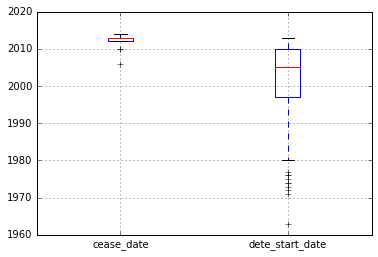

In [362]:
dete_resignations.boxplot(column=['cease_date', 'dete_start_date'])

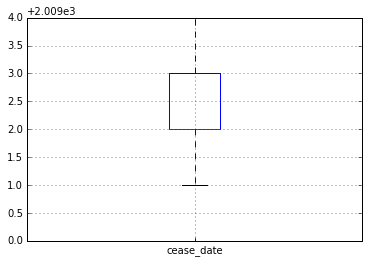

In [363]:
tafe_resignations.boxplot(column=['cease_date'])

there are no start dates before 1940 or after 2013

create an institute_service column in dete_resignations

In [364]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

In [365]:
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [366]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True
tafe_dissatisfied_columns=['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']
tafe_resignations=tafe_resignations.copy()
tafe_resignations[tafe_dissatisfied_columns]=tafe_resignations[tafe_dissatisfied_columns].applymap(update_vals)

In [367]:
# print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
# print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

In [368]:
# print(dete_resignations['job_dissatisfaction'].value_counts(dropna=False))
# print(dete_resignations['dissatisfaction_with_the_department'].value_counts(dropna=False))
# print(dete_resignations['physical_work_environment'].value_counts(dropna=False))
# print(dete_resignations['lack_of_recognition'].value_counts(dropna=False))
# print(dete_resignations['lack_of_job_security'].value_counts(dropna=False))
# print(dete_resignations['work_location'].value_counts(dropna=False))
# print(dete_resignations['employment_conditions'].value_counts(dropna=False))
# print(dete_resignations['work_life_balance'].value_counts(dropna=False))
# print(dete_resignations['workload'].value_counts(dropna=False))

In [369]:
def show_value_counts(df_name, col_names):
    for each_series in col_names:
        print(df_name[each_series].value_counts(dropna=False))

In [370]:
show_value_counts(tafe_resignations, tafe_dissatisfied_columns)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [371]:
dete_dissatisfied_columns=['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
show_value_counts(dete_resignations, dete_dissatisfied_columns)

False    270
True      41
Name: job_dissatisfaction, dtype: int64
False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64
False    305
True       6
Name: physical_work_environment, dtype: int64
False    278
True      33
Name: lack_of_recognition, dtype: int64
False    297
True      14
Name: lack_of_job_security, dtype: int64
False    293
True      18
Name: work_location, dtype: int64
False    288
True      23
Name: employment_conditions, dtype: int64
False    243
True      68
Name: work_life_balance, dtype: int64
False    284
True      27
Name: workload, dtype: int64


In [372]:
dete_resignations['dissatisfied']=dete_resignations[dete_dissatisfied_columns].any(axis=1, skipna=False)
tafe_resignations['dissatisfied']=tafe_resignations[tafe_dissatisfied_columns].any(axis=1, skipna=False)
print(dete_resignations['dissatisfied'].value_counts(dropna=False))
print(tafe_resignations['dissatisfied'].value_counts(dropna=False))
dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()

False    162
True     149
Name: dissatisfied, dtype: int64
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64


check to see if the employee responded true to any of the dissatisfied columns in each of the dataframe

In [373]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'
combined=pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True)
combined_updated=combined.dropna(thresh=500, axis=1)

combined the two dataframes and remove any columns that have a significant amount of data missing

In [374]:
print(combined_updated['institute_service'].astype('str').value_counts(dropna=False).sort_index())

0.0                   20
1-2                   64
1.0                   22
10.0                   6
11-20                 26
11.0                   4
12.0                   6
13.0                   8
14.0                   6
15.0                   7
16.0                   5
17.0                   6
18.0                   5
19.0                   3
2.0                   14
20.0                   7
21.0                   3
22.0                   6
23.0                   4
24.0                   4
25.0                   2
26.0                   2
27.0                   1
28.0                   2
29.0                   1
3-4                   63
3.0                   20
30.0                   2
31.0                   1
32.0                   3
33.0                   1
34.0                   1
35.0                   1
36.0                   2
38.0                   1
39.0                   3
4.0                   16
41.0                   1
42.0                   1
49.0                   1


categorize the institute_service into following: 
New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

In [375]:
combined_updated=combined_updated.copy()
combined_updated['institute_service']=combined_updated['institute_service'].astype('str').str.extract(r'(\d+)', expand=False).astype('float')

create a function to categorize

In [376]:
def career_stages_mapping(val):
    if pd.isnull(val):
        return np.nan
    elif val< 3:
        return 'New'
    elif val<= 7:
        return 'Experienced'
    elif val<= 10:
        return 'Established'
    else:
        return 'Veteran'
combined_updated['service_cat']=combined_updated['institute_service'].apply(career_stages_mapping)

studies have argued that understanding employee's needs according to career stage instead of age is more effective

In [377]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))
print(combined_updated['service_cat'].value_counts(dropna=False))

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64
Experienced    206
New            193
Veteran        136
NaN             88
Established     28
Name: service_cat, dtype: int64


In [378]:
combined_updated['dissatisfied']=combined_updated['dissatisfied'].fillna(False)

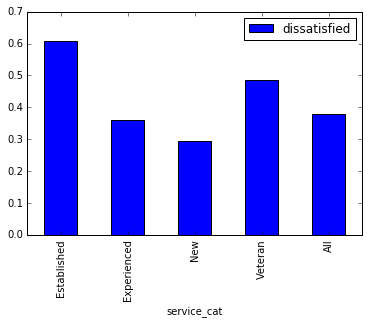

In [379]:
combined_updated_pt=combined_updated.pivot_table(values='dissatisfied', index='service_cat', margins=True)
combined_updated_pt.plot(kind='bar')

on average, new established employees are the most dissatsified where as the new employees are the least dissatisfied